# Python Automation Short Course
by John Hogland 3/21/2022

In this short course we will discuss python programming fundamentals and explore some basic functionality within the raster_tools package using Apalachicola National Forest vegetated polygons.

## Apalachicola NF stands (ANFS)
ANFS depict the spatial geometry of vegetated polygons (management units) within the Apalachicola National Forest.

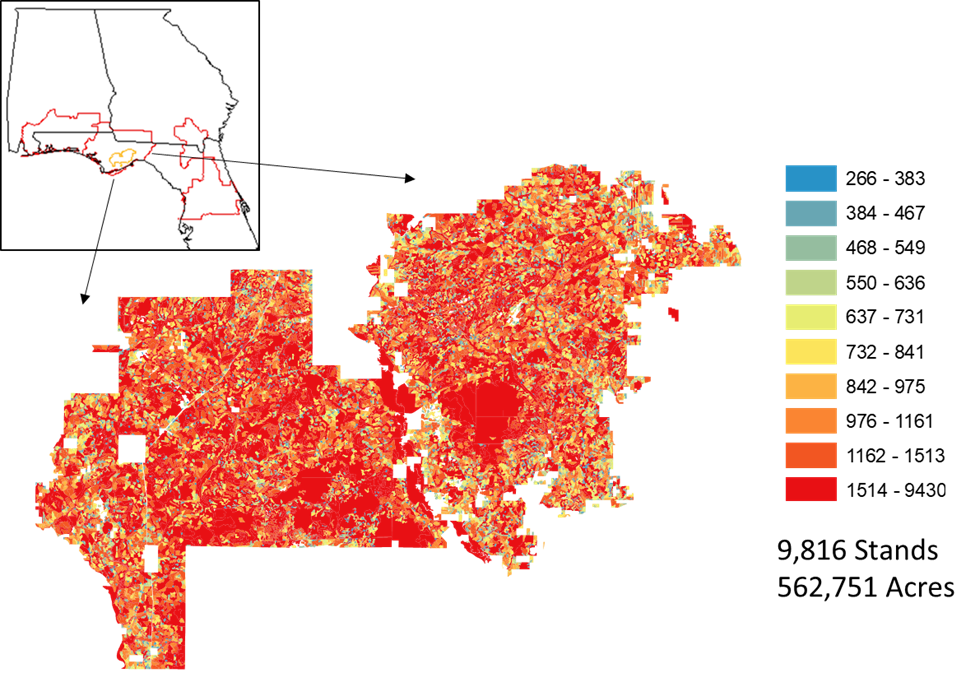!

1. ANFStands.shp - Apalachicola National Forest Stands
2. 9,816 Stands (all the forest)
3. 562,751 Acres (all the forest)


## Install raster_tools and upgrade dependencies

In [ ]:
# !pip install --upgrade gdown
# !pip install --upgrade numba
# !pip install --upgrade geopandas
# !pip install mapclassify
# !pip install --upgrade datascience
# !pip install --upgrade gym
# !pip install --upgrade folium
# !pip install raster_tools
# !pip install schedule
# !pip intall graphviz

## Get the data

In [ ]:
# import gdown, zipfile

# url='https://drive.google.com/file/d/1flAZzNiYDkdOuwvN0m4rfshOMgojXoGC/view?usp=sharing'
# outfl= r'./ANF_Notebook_data.zip'
# gdown.download(url=url,output=outfl,quiet=False,fuzzy=True)

# with zipfile.ZipFile(outfl, 'r') as zip_ref:
#     zip_ref.extractall(".")

# Automation 1: Creating a script and running it from a cell, as a module, or from command line
## Hello World from a cell (shift enter)

In [ ]:
print('Hello World')

## Hello World from python file (shift enter)
1. Create a new python file called "HelloWorld.py" - File->New->Python File
2. Open the file
3. Type print('Hello World')
4. Save file
5. import HelloWorld

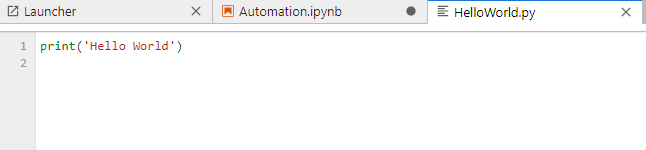

In [ ]:
import HelloWorld

## Hello World from shell
1. Launch PowerShell - File->New->Terminal
2. Type python HelloWorld.py - this will print out Hello World in the terminal

## Create a script that:
1. loads the data
2. lists the fields
3. creates a map of the data using Acres field
4. lists how many stands and acres are in the subset

In [ ]:
from raster_tools import open_vectors
import numpy as np

anfs=open_vectors('ANFStands.shp')
print("Field Names:\n" + str(anfs.field_names))
gdf=anfs.data.compute()
gdf.plot(column='ACRES',cmap='Spectral_r',legend=True,figsize=(14,8))
print('Total acres = ' + str(np.round(gdf['ACRES'].sum(),decimals=2)))
print('Total polygons = ' + str(gdf.shape[0]))

## Convert the script into a function that takes parameters

In [ ]:
def map_sum(path, field, cmap='Spectral'):
    anfs=open_vectors(path)
    print("Field Names:\n" + str(anfs.field_names))
    gdf=anfs.data.compute()
    gdf.plot(column='ACRES',cmap='Spectral_r',legend=True,figsize=(14,8))
    print('Total acres = ' + str(gdf['ACRES'].sum()))
    print('Total polygons = ' + str(gdf.shape[0]))
    return gdf

anfs_path = 'ANFStands.shp'
column_field = 'ACRES'
color_ramp = 'Spectral'
g=map_sum(anfs_path,column_field,color_ramp)

## Convert your function into a module called map_and_sum
1. make a new python file called map_and_sum.py
2. add: from raster_tools import open_vectors
3. copy the map_sum function
4. import your module, set variables, and call the function

How does python know where map_and_sum is located?

In [ ]:
import map_and_sum, os
anfs_path=os.getcwd() + '\\ANFStands.shp' 
#note we need to specify the full path here because we are no longer calling the function from the the location of the notebook as the root
fld='ACRES'
g=map_and_sum.map_sum(anfs_path,column_field,color_ramp)

## Adding system arguments and calling from command line
1. make a new python file called arg_map_and_sum.py
2. add import sys module
3. add import map_and_sum module
5. add three sys.arg parameters (e.g.,path=sys.argv[1])
6. call the map_sum function using the sys.argv values within the arg_map_and_sum module
7. from command line: python arg_map_and_sum.py 'C:\Users\jshogland\Documents\temp\ANFStands.shp' 'ACRES'

Why didn't the map print?


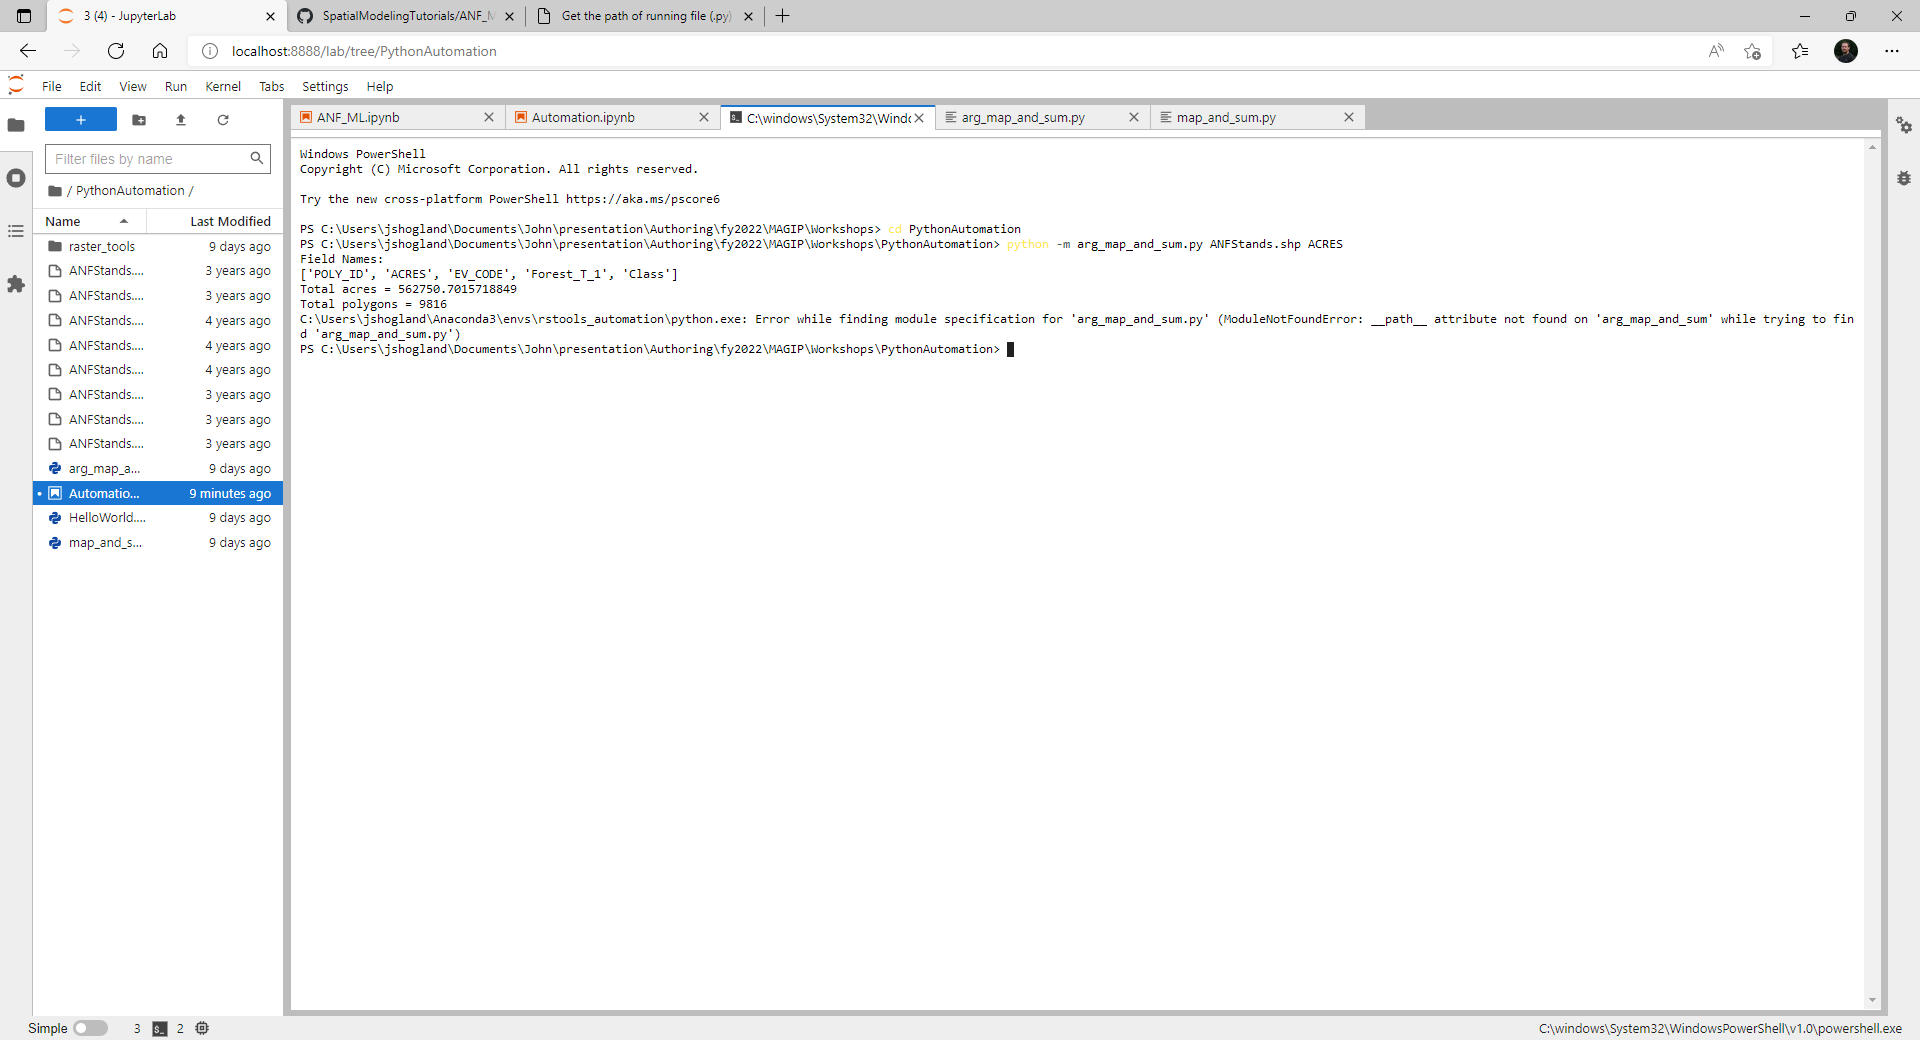

___________________________________________________________________________________
# Break
___________________________________________________________________________________

# Automation 2: classes and inheritance
## Hello World 2

In [ ]:
def basic_hello(text):
    print(text)

class c_hello:
    def __init__(self,text):
        self.text = text
    
    def hello(self):
        print(self.text + " World from c_hello")

class c_hello2(c_hello):
    def __init__(self, text):
        c_hello.__init__(self,text)
    def hello2(self):
        print(self.text + " World from c_hello2")
        

## Use the definitions and classes

In [ ]:
print('Message from definition')
basic_hello('Hello from basic_hello')

#c_hello
print('\nMessage from c_hello object')
ch=c_hello('Hello')
ch.hello()

#c_hello2
print('\nMessages from c_hello2 object')
ch2=c_hello2('Hello')
ch2.hello()
ch2.hello2()

## Hello World 2 as a module
- create a module called hello_world2.py
- copy code into that module
- save the module
- use the module to print out the various hello world statements

In [ ]:
import hello_world2 as hw2

print('Message from definition')
hw2.basic_hello('Hello from basic_hello')

#c_hello
print('\nMessage from c_hello object')
ch=hw2.c_hello('Hello')
ch.hello()

#c_hello2
print('\nMessages from c_hello2 object')
ch2=hw2.c_hello2('Hello')
ch2.hello()
ch2.hello2()

## Creating shape metrics
- create a spatial_metrics class
- pa function
- fractal function

In [ ]:
import pandas as pd
class spatial_metrics:
    def __init__(self,vct):
        self.vct = vct
        self.geo = self.vct.geometry
        self.area = self.vct.data.area
        self.perimeter = self.vct.data.length
    
    def pa(self):
        return self.perimeter/self.area
    
    def fractal(self):
        return np.log(self.area)/(np.log(self.perimeter)+np.log(0.25))

## Use the spatial_metrics class to estimate perimeter to area ratio (pa) and fractal dimension (fractal)
- results will be a delayed processing series
- merge series to the attribute table of anfs
- view the data

In [ ]:
spm=spatial_metrics(anfs)
frc=spm.fractal()
pa=spm.pa()
anfs_sp=anfs.data.assign(PA=pa,FRACTAL=frc)
anfs_sp.compute()

## Shape metrics class as a module
- create a metrics module
- use module and classes to add fields to anfs_sp1
- view the data

In [ ]:
import metrics
spm1=metrics.spatial_metrics(anfs)
frc1=spm1.fractal()
pa1=spm1.pa()
anfs_sp1=anfs.data.assign(PA=pa1,FRACTAL=frc1)
anfs_sp1.compute()

## Plot PA and FRACTAL surfaces
- use the map_sum function
- use a for loop to fill subplots

In [ ]:
import matplotlib.pyplot as plt
f, axes = plt.subplots(figsize=(20, 6), ncols=2, nrows=1,tight_layout=True)

cnt=0
clms=['FRACTAL','PA']
for x in clms:
    axes[cnt].set_title(x, fontdict={'fontsize': 25, 'fontweight' : 3})
    anfs_sp1.compute().plot(ax=axes[cnt],column=x,cmap='Spectral',legend=True)
    cnt+=1

## Save anfs_sp1 as anfs_sp1

In [ ]:
anfs_sp1.compute().to_file('anfs_sp1.shp')

___________________________________________________________________________________
# Break
___________________________________________________________________________________

# Automation 3: Scheduled Tasks
- The schedule package
- create a run_metric.py file
- create a task

## Create run_metric.py file
- use anfs file path
- add PA and FRACTAL fields
- save the results as a new shapefile

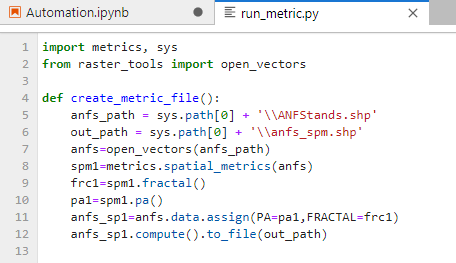

## Create scheduled task 
- launch in 30 seconds
- runs the create_metric_file

In [ ]:
import schedule, time, run_metric

def job_that_executes_once():
    run_metric.create_metric_file()
    print("finished")
    return schedule.CancelJob


schedule.every(30).seconds.do(job_that_executes_once)

while True:
    schedule.run_pending()
    if not schedule.jobs:
        break
    time.sleep(1)


# Automation 4: User Interface and Widgets
- create a interactive map with area, StreetMaps, and area imagery as a backdrop
- add widgets to the map
- save as a html file

In [ ]:
import folium
from folium import plugins
p1=anfs_sp1.compute().explore(name="Fractal",column='FRACTAL',style_kwds={'opacity':0.7})

#add ESRI's tiled imagery to potential base maps
folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Imagery',
        overlay = False,
        control = True
       ).add_to(p1)

#show the interactive map
p1

## Add widgets

In [ ]:
#add widgets to the map

fs=plugins.Fullscreen()
dr=plugins.Draw()
lc=plugins.LocateControl()
ms=plugins.MeasureControl(position='bottomleft')
msp=plugins.MousePosition()
ms.add_to(p1)
msp.add_to(p1)
lc.add_to(p1)
dr.add_to(p1)
fs.add_to(p1)
folium.LayerControl().add_to(p1)
p1

## Save map as html
- download if working in Colab and open in web browser

In [ ]:
p1.save('anf.html')

## Check out the other notebooks at https://github.com/jshogland/SpatialModelingTutorials/tree/main/Notebooks and explore the functionality within the raster_tools library

# References
- Spatial Modeling Notebooks:  https://github.com/jshogland/SpatialModelingTutorials
- Raster-Tools GitHub: https://github.com/UM-RMRS/raster_tools
- Hogland's Spatial Solutions: https://sites.google.com/view/hoglandsspatialsolutions/home
- Dask: https://dask.org/
- Geopandas:https://geopandas.org/en/stable/
- Xarray: https://docs.xarray.dev/en/stable/
- Jupyter: https://jupyter.org/
- Anaconda:https://www.anaconda.com/
- VS Code: https://code.visualstudio.com/
- ipywidgets: https://ipywidgets.readthedocs.io/en/latest/
- numpy:https://numpy.org/
- matplotlib:https://matplotlib.org/
- folium: https://python-visualization.github.io/folium/
- pandas: https://pandas.pydata.org/
- os: https://docs.python.org/3/library/os.html